In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from geopy.geocoders import Nominatim

In [66]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [94]:
df_1 = pd.read_csv('./data/subway/1호선.csv', encoding='cp949')
df_1.drop('Unnamed: 0', axis = 1, inplace = True)
df_1

,철도운영기관명,선명,역명,지번주소,도로명주소,경도,위도
0,코레일,1호선,소요산,경기도 동두천시 상봉암동 126-3,경기도 동두천시 평화로 2925,127.061125,37.947895
1,코레일,1호선,동두천,경기도 동두천시 동두천동 245-210,경기도 동두천시 평화로 2687,127.054710,37.927749
2,코레일,1호선,보산,경기도 동두천시 보산동 422,경기도 동두천시 평화로 2539,127.057221,37.914287
3,코레일,1호선,동두천중앙,경기도 동두천시 생연동 726-3,경기도 동두천시 동두천로 228,127.056219,37.901764
4,코레일,1호선,지행,경기도 동두천시 지행동 424-1,경기도 동두천시 평화로 2285,127.055643,37.891836
...,...,...,...,...,...,...,...
92,서울교통공사,1호선,종로5가,서울특별시 종로구 종로5가 82-1,서울특별시 종로구 종로 지하 216,127.001846,37.570354
93,서울교통공사,1호선,종로3가,서울특별시 종로구 종로3가 10-5,서울특별시 종로구 종로 지하 129,126.991005,37.570371
94,서울교통공사,1호선,종각,서울특별시 종로구 종로1가 54,서울특별시 종로구 종로 지하 55,126.983099,37.570169
95,서울교통공사,1호선,시청,서울특별시 중구 정동 5-5,서울특별시 세종대로 지하 101,126.976862,37.565704


In [95]:
wrong = df_1['도로명주소'].str.contains("서울특별시")
df_1 = df_1[wrong]
df_1.reset_index(inplace = True, drop=True)
df_1 = df_1[['역명', '도로명주소', '경도', '위도']]
df_1

,역명,도로명주소,경도,위도
0,도봉산,서울특별시 도봉구 도봉로 964-33,127.046130,37.689176
1,도봉,서울특별시 도봉구 도봉로 170길 2,127.045755,37.680323
2,방학,서울특별시 도봉구 도봉로 150다길 3,127.044409,37.666308
3,창동,서울특별시 도봉구 마들로11길 77,127.048114,37.653186
4,녹천,서울특별시 도붕구 덕릉로 376,127.045418,37.643186
5,월계,서울특별시 노원구 월계로53길 40,127.058775,37.631957
6,광운대,서울특별시 노원구 석계로 98-2,127.061663,37.623202
7,석계,서울특별시 노원구 화랑로 341,127.065632,37.615270
8,신이문,서울특별시 동대문구 한천로 472,127.068660,37.605476
9,외대앞,서울특별시 동대문구 휘경로 27,127.063025,37.595360


In [96]:
df_2 = pd.read_csv('./data/subway/2호선.csv', encoding='cp949')
df_2.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_2['도로명주소'].str.contains("서울특별시")
df_2 = df_2[wrong]
df_2.reset_index(inplace = True, drop=True)
df_2 = df_2[['역명', '도로명주소', '경도', '위도']]
df_2

,역명,도로명주소,경도,위도
0,시청,서울특별시 중구 서소문로 지하 127,127.008417,37.565267
1,을지로입구,서울특별시 중구 을지로 지하 42,126.982679,37.566065
2,을지로3가,서울특별시 중구 을지로 지하 106,127.008417,37.565267
3,을지로4가,서울특별시 중구 을지로 지하 178,126.997733,37.566621
4,동대문역사문화공원,서울특별시 중구 을지로 지하 279,127.008485,37.565718
5,신당,서울특별시 중구 퇴계로 지하 431-1,126.994597,37.560972
6,상왕십리,서울특별시 성동구 왕십리로 지하 374,127.032078,37.560280
7,왕십리,서울특별시 성동구 왕십리로 지하 300,127.036305,37.561182
8,한양대,서울특별시 성동구 왕십리로 206,127.043658,37.555259
9,뚝섬,서울특별시 성동구 아차산로 18,127.047380,37.547177


In [97]:
df_3 = pd.read_csv('./data/subway/3호선.csv', encoding='cp949')
df_3.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_3['도로명주소'].str.contains("서울특별시")
df_3 = df_3[wrong]
df_3.reset_index(inplace = True, drop=True)
df_3 = df_3[['역명', '도로명주소', '경도', '위도']]
df_3

,역명,도로명주소,경도,위도
0,구파발,서울특별시 은평구 진관2로 지하 15-25,126.920546,37.635425
1,연신내,서울특별시 은평구 통일로 지하 849 3호선,126.915895,37.624559
2,불광,서울특별시 은평구 통일로 지하 723-1 3호선,126.920832,37.618888
3,녹번,서울특별시 은평구 통일로 지하 602-1,126.934997,37.601121
4,홍제,서울특별시 서대문구 통일로 지하 440-1,126.944227,37.588672
5,무악재,서울특별시 서대문구 통일로 지하 361,126.919975,37.579358
6,독립문,서울특별시 서대문구 통일로 지하 247,126.956360,37.574061
7,경복궁(정부서울청사),서울특별시 종로구 사직로 지하 130,126.973307,37.575327
8,안국,서울특별시 종로구 율곡로 지하62,126.985622,37.576573
9,종로3가,서울특별시 종로구 돈화문로 지하 30,126.989888,37.574385


In [98]:
df_4 = pd.read_csv('./data/subway/4호선.csv', encoding='cp949')
df_4.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_4['도로명주소'].str.contains("서울특별시")
df_4 = df_4[wrong]
df_4.reset_index(inplace = True, drop=True)
df_4 = df_4[['역명', '도로명주소', '경도', '위도']]
df_4

,역명,도로명주소,경도,위도
0,당고개,서울특별시 노원구 상계로 305,127.079306,37.670556
1,상계,서울특별시 노원구 상계로 182,127.073526,37.661095
2,노원,서울특별시 노원구 상계로 69-1,127.061991,37.655867
3,창동,서울특별시 도봉구 마들로 11길 77,127.048114,37.653186
4,쌍문,서울특별시 도봉구 도봉로 지하 486-1,127.040780,37.670341
5,수유(강북구청),서울특별시 강북구 도봉로 지하 338,127.016670,37.642490
6,미아,서울특별시 강북구 도봉로 지하 198,127.024155,37.636077
7,미아사거리,서울특별시 강북구 도봉로 지하 50,127.030107,37.642500
8,길음,서울특별시 성북구 동소문로 지하 248,127.023686,37.602920
9,성신여대입구(돈암),서울특별시 성북구 동소문로 지하 102,127.010577,37.591421


In [99]:
df_5 = pd.read_csv('./data/subway/5호선.csv', encoding='cp949')
df_5.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_5['도로명주소'].str.contains("서울특별시")
df_5 = df_5[wrong]
df_5.reset_index(inplace = True, drop=True)
df_5 = df_5[['역명', '도로명주소', '경도', '위도']]
df_5

,역명,도로명주소,경도,위도
0,방화,서울특별시 강서구 금낭화로 지하132 (방화동),126.813042,37.573271
1,개화산,서울특별시 강서구 양천로 22?(방화동),126.814478,37.572677
2,김포공항,서울특별시 강서구 하늘길 지하77 (방화동),126.801890,37.561832
3,송정,서울특별시 강서구 공항대로 지하33 (공항동),126.808716,37.561297
4,마곡,서울특별시 강서구 공항대로 지하163 (가양동),126.824664,37.560250
5,발산,서울특별시 강서구 공항대로 지하267 (가양동),126.837220,37.558947
6,우장산,서울특별시 강서구 강서로 지하262 (화곡동),126.836401,37.549183
7,화곡,서울특별시 강서구 화곡로 지하168 (화곡동),126.845158,37.548869
8,까치산,서울특별시 강서구 강서로 지하54?(화곡동),126.841265,37.553594
9,신정(은행정),서울특별시 양천구 오목로 지하179 (신정동),126.872783,37.524288


In [100]:
df_6 = pd.read_csv('./data/subway/6호선.csv', encoding='cp949')
df_6.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_6['도로명주소'].str.contains("서울특별시")
df_6 = df_6[wrong]
df_6.reset_index(inplace = True, drop=True)
df_6 = df_3[['역명', '도로명주소', '경도', '위도']]
df_6

,역명,도로명주소,경도,위도
0,구파발,서울특별시 은평구 진관2로 지하 15-25,126.920546,37.635425
1,연신내,서울특별시 은평구 통일로 지하 849 3호선,126.915895,37.624559
2,불광,서울특별시 은평구 통일로 지하 723-1 3호선,126.920832,37.618888
3,녹번,서울특별시 은평구 통일로 지하 602-1,126.934997,37.601121
4,홍제,서울특별시 서대문구 통일로 지하 440-1,126.944227,37.588672
5,무악재,서울특별시 서대문구 통일로 지하 361,126.919975,37.579358
6,독립문,서울특별시 서대문구 통일로 지하 247,126.956360,37.574061
7,경복궁(정부서울청사),서울특별시 종로구 사직로 지하 130,126.973307,37.575327
8,안국,서울특별시 종로구 율곡로 지하62,126.985622,37.576573
9,종로3가,서울특별시 종로구 돈화문로 지하 30,126.989888,37.574385


In [101]:
df_7 = pd.read_csv('./data/subway/7호선.csv', encoding='cp949')
df_7.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_7['도로명주소'].str.contains("서울특별시")
df_7 = df_7[wrong]
df_7.reset_index(inplace = True, drop=True)
df_7 = df_7[['역명', '도로명주소', '경도', '위도']]
df_7

,역명,도로명주소,경도,위도
0,도봉산,서울특별시 도봉구 도봉로 964-40 (도봉동),127.046509,37.689080
1,수락산,서울특별시 노원구 동일로 지하1662 (상계동),127.061700,37.654232
2,마들,서울특별시 노원구 동일로 지하1530-1 (상계동),127.062566,37.656396
3,노원,서울특별시 노원구 동일로 지하1409 (상계동),127.062228,37.656339
4,중계,서울특별시 노원구 동일로 지하1308-1 (중계동),127.073044,37.656358
5,하계,서울특별시 노원구 동일로 지하1196?(하계동),127.068016,37.636360
6,공릉(서울과학기술대),서울특별시 노원구 동일로 지하1074 (공릉동),127.074125,37.625807
7,태릉입구,서울특별시 노원구 동일로 지하992-1 (공릉동),127.074833,37.622122
8,먹골,서울특별시 중랑구 동일로 지하901?(묵동),127.077660,37.610248
9,중화,서울특별시 중랑구 동일로 지하797 (중화동),127.078035,37.604297


In [102]:
df_8 = pd.read_csv('./data/subway/8호선.csv', encoding='cp949')
df_8.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_8['도로명주소'].str.contains("서울특별시")
df_8 = df_8[wrong]
df_8.reset_index(inplace = True, drop=True)
df_8 = df_8[['역명', '도로명주소', '경도', '위도']]
df_8

,역명,도로명주소,경도,위도
0,암사,서울특별시 강동구 올림픽로 지하776 (암사동),127.127552,37.548673
1,천호(풍납토성),서울특별시 강동구 천호대로 지하997 (천호동),127.123388,37.538603
2,강동구청,서울특별시 강동구 올림픽로 지하550 (성내동),127.120623,37.530685
3,몽촌토성(평화의문),서울특별시 송파구 올림픽로 지하383 (신천동),127.099500,37.520071
4,잠실(송파구청),서울특별시 송파구 올림픽로 305 (신천동),127.109459,37.521121
5,석촌,서울특별시 송파구 송파대로 지하439?(석촌동),127.103570,37.503517
6,송파,서울특별시 송파구 송파대로 지하354 (가락동),127.115713,37.495278
7,가락시장,서울특별시 송파구 송파대로 지하257?(가락동),127.115713,37.495278
8,문정,서울특별시 송파구 송파대로 지하179 (문정동),127.119055,37.484958
9,장지,서울특별시 송파구 송파대로 지하82?(장지동),127.128528,37.477387


In [103]:
df_9 = pd.read_csv('./data/subway/9호선.csv', encoding='cp949')
df_9.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_9['도로명주소'].str.contains("서울특별시")
df_9 = df_9[wrong]
df_9.reset_index(inplace = True, drop=True)
df_9 = df_9[['역명', '도로명주소', '경도', '위도']]
df_9

,역명,도로명주소,경도,위도
0,개화,서울특별시 강서구 개화동로 8길 38,126.794962,37.580406
1,김포공항,서울특별시 강서구 하늘길 77,126.802512,37.566773
2,공항시장,서울특별시 강서구 방화동로 30,126.810607,37.563483
3,신방화,서울특별시 강서구 방화대로 301,126.816084,37.567418
4,마곡나루,서울특별시 강서구 마곡중앙5로 2,126.827427,37.564979
5,양천향교,서울특별시 강서구 양천로 341,126.840790,37.568626
6,가양,서울특별시 강서구 양천로 485,126.853979,37.561727
7,증미,서울특별시 강서구 양천로 560,126.861568,37.557504
8,등촌,서울특별시 강서구 공항대로 529,126.864736,37.551096
9,염창,서울특별시 강서구 공항대로 631,126.875167,37.547028


In [104]:
df_10 = pd.read_csv('./data/subway/경의중앙.csv', encoding='cp949')
df_10.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_10['도로명주소'].str.contains("서울특별시")
df_10 = df_10[wrong]
df_10.reset_index(inplace = True, drop=True)
df_10 = df_10[['역명', '도로명주소', '경도', '위도']]
df_10

,역명,도로명주소,경도,위도
0,용산,서울특별시 용산구 한강대로 23길 55,126.964045,37.528854
1,이촌,서울특별시 용산구 이촌로 71길 42,126.973583,37.522190
2,서빙고,서울특별시 용산구 서빙고로 238,126.991172,37.519777
3,한남,서울특별시 용산구 독서당로 6길 12-13,127.010683,37.530007
4,옥수,서울특별시 성동구 동호로 21,127.017221,37.539895
5,응봉,서울특별시 성동구 고산자로 123,127.034798,37.550343
6,왕십리,서울특별시 성동구 왕십리광장로 17,127.037942,37.562148
7,청량리,서울특별시 동대문구 왕산로 214,127.047901,37.579293
8,회기,서울특별시 동대문구 회기로 196,127.058025,37.589700
9,중랑,서울특별시 중랑구 중랑역로 9,127.075408,37.595594


In [105]:
df_11 = pd.read_csv('./data/subway/경춘.csv', encoding='cp949')
df_11.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_11['도로명주소'].str.contains("서울특별시")
df_11 = df_11[wrong]
df_11.reset_index(inplace = True, drop=True)
df_11 = df_11[['역명', '도로명주소', '경도', '위도']]
df_11

,역명,도로명주소,경도,위도
0,광운대,서울특별시 노원구 석계로 98-2,127.061663,37.623202
1,청량리,서울특별시 동대문구 왕산로 214,127.047901,37.579293
2,회기,서울특별시 동대문구 회기로 196,127.058025,37.589700
3,중랑,서울특별시 중랑구 중랑역로 9,127.075408,37.595594
4,상봉,서울특별시 중랑구 망우로 297,127.086005,37.596706
5,망우,서울특별시 중랑구 망우로 55길 11-10,127.091074,37.599122
6,신내,서울특별시 중랑구 신내역로 20,127.103213,37.612668


In [106]:
df_12 = pd.read_csv('./data/subway/공항.csv', encoding='cp949')
df_12.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_12['도로명주소'].str.contains("서울특별시")
df_12 = df_12[wrong]
df_12.reset_index(inplace = True, drop=True)
df_12 = df_12[['역명', '도로명주소', '경도', '위도']]
df_12

,역명,도로명주소,경도,위도
0,서울역,서울특별시 용산구 청파로 378,126.970466,37.549065
1,공덕,서울특별시 마포구 마포대로 92,126.951205,37.543016
2,홍대입구,서울특별시 마포구 양화로 188,126.918612,37.552785
3,디지털미디어시티,서울특별시 마포구 성암로 184,126.903585,37.574093
4,김포공항,서울특별시 강서구 하늘길 77,126.802512,37.566773


In [107]:
df_13 = pd.read_csv('./data/subway/분당.csv', encoding='cp949')
df_13.drop('Unnamed: 0', axis = 1, inplace = True)
wrong = df_13['도로명주소'].str.contains("서울특별시")
df_13 = df_13[wrong]
df_13.reset_index(inplace = True, drop=True)
df_13 = df_13[['역명', '도로명주소', '경도', '위도']]
df_13

,역명,도로명주소,경도,위도
0,왕십리,서울특별시 성동구 왕십리광장로 17,127.037942,37.562148
1,서울숲,서울특별시 성동구 왕십리로 77,127.043681,37.549300
2,압구정로데오,서울특별시 강남구 압구정로 402,127.035794,37.527021
3,강남구청,서울특별시 강남구 학동로 346,127.041288,37.517161
4,선정릉(한국과학창의재단),서울특별시 강남구 선릉로 580,127.047777,37.507034
5,선릉,서울특별시 강남구 선릉로 340,127.051429,37.500182
6,한티,서울특별시 강남구 선릉로 228,127.052870,37.496207
7,도곡,서울특별시 강남구 남부순환로 2814,127.055306,37.490825
8,구룡,서울특별시 강남구 개포로 403,127.059249,37.487026
9,개포동,서울특별시 강남구 개포로 420,127.066531,37.489233


In [108]:
df_14 = pd.read_excel('./data/subway/신분당선 주소데이터.xlsx')

wrong = df_14['도로명주소'].str.contains("서울특별시")
df_14 = df_14[wrong]
df_14.reset_index(inplace = True, drop=True)
df_14 = df_14[['역명', '도로명주소']]

In [109]:
i = 0
address = []

for i in range(len(df_14['도로명주소'])):
    a = df_14.loc[i, '도로명주소'].split(' ')
    address.append(" ".join(a[1:4]))

In [110]:
geo_local = Nominatim(user_agent='South Korea')
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [111]:
latitude = []
longitude =[]
i = 0
for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [112]:
i = 0
for i in range(0, 4):
    df_14.loc[i, '위도'] = latitude[i]
    df_14.loc[i, '경도'] = longitude[i]
df_14

,역명,도로명주소,위도,경도
0,강남,서울특별시 강남구 강남대로 396,37.511974,127.021006
1,양재(서초구청),서울특별시 서초구 남부순환로 2585,37.479512,127.010608
2,양재시민의숲(매헌),서울특별시 서초구 매헌로 116,37.468619,127.036509
3,청계산입구,서울특별시 서초구 청계산로 179,37.456132,127.049171


In [114]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14])
df = df.drop_duplicates(['역명'])
df

,역명,도로명주소,경도,위도
0,도봉산,서울특별시 도봉구 도봉로 964-33,127.046130,37.689176
1,도봉,서울특별시 도봉구 도봉로 170길 2,127.045755,37.680323
2,방학,서울특별시 도봉구 도봉로 150다길 3,127.044409,37.666308
3,창동,서울특별시 도봉구 마들로11길 77,127.048114,37.653186
4,녹천,서울특별시 도붕구 덕릉로 376,127.045418,37.643186
...,...,...,...,...
9,개포동,서울특별시 강남구 개포로 420,127.066531,37.489233
10,대모산입구,서울특별시 강남구 개포로 522,127.073161,37.491515
12,복정(동서울대학),서울특별시 송파구 송파대로 6,127.126700,37.470686
2,양재시민의숲(매헌),서울특별시 서초구 매헌로 116,127.036509,37.468619


In [120]:
for i in range(0, len(df)):
    df.loc[i, '역명'] = df.loc[i, '역명'].split('(')[0]
df = df.drop_duplicates(['역명'])
df.reset_index(drop=True, inplace = True)
df

,역명,도로명주소,경도,위도
0,도봉산,서울특별시 도봉구 도봉로 964-33,127.046130,37.689176
1,도봉,서울특별시 도봉구 도봉로 170길 2,127.045755,37.680323
2,방학,서울특별시 도봉구 도봉로 150다길 3,127.044409,37.666308
3,창동,서울특별시 도봉구 마들로11길 77,127.048114,37.653186
4,녹천,서울특별시 도붕구 덕릉로 376,127.045418,37.643186
...,...,...,...,...
246,구룡,서울특별시 강남구 개포로 403,127.059249,37.487026
247,개포동,서울특별시 강남구 개포로 420,127.066531,37.489233
248,대모산입구,서울특별시 강남구 개포로 522,127.073161,37.491515
249,양재시민의숲,서울특별시 서초구 매헌로 116,127.036509,37.468619


In [121]:
df.to_csv('./data/data_set/서울시 지하철.csv')

In [122]:
df_15 = pd.read_csv('./data/subway/서울교통공사_환승역거리소요시간정보_20210701.csv', encoding='cp949', usecols = ['환승역명'])
df_15 = df_15.drop_duplicates(['환승역명'])
df_15.reset_index(drop=True, inplace = True)
df_15

,환승역명
0,서울역
1,시청
2,종로3가
3,동대문
4,동묘앞
...,...
68,부평구청
69,석촌
70,복정
71,모란


In [123]:
li = []
for i in range(0, len(df_15)):
    li.append(df_15.loc[i, '환승역명'])

In [126]:
df_trans = df[df['역명'].isin(li)]
df_trans.reset_index(drop=True, inplace = True)
df_trans

,역명,도로명주소,경도,위도
0,도봉산,서울특별시 도봉구 도봉로 964-33,127.046130,37.689176
1,창동,서울특별시 도봉구 마들로11길 77,127.048114,37.653186
2,석계,서울특별시 노원구 화랑로 341,127.065632,37.615270
3,신길,서울특별시 영등포구 영등포로 327,126.917190,37.517018
4,신도림,서울특별시 구로구 새말로 지하117-21,126.891010,37.508809
...,...,...,...,...
63,복정,서울특별시 송파구 송파대로 지하6 (장지동),127.126339,37.482171
64,선정릉,서울특별시 강남구 선릉로 580,127.047777,37.507034
65,효창공원앞,서울특별시 용산구 백범로 지하287 (효창동),126.961353,37.539263
66,디지털미디어시티,서울특별시 은평구 수색로 193,126.899589,37.578087


In [128]:
from haversine import haversine

In [129]:
res = pd.read_csv('./data/data_set/맛집 데이터 3.5 이상.csv')
res.drop('Unnamed: 0', axis = 1, inplace = True)
res

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000


In [137]:
start = (float(df_trans.loc[4, '위도']), float(df_trans.loc[4, '경도'])) # (lat, lon)
goal = (float(df_trans.loc[66, '위도']), float(df_trans.loc[66, '경도']))

In [138]:
haversine(start, goal)

7.740406570917519

In [140]:
i = 0
address = []

for i in range(len(res['주소'])):
    a = res.loc[i, '주소'].split(' ')
    address.append(" ".join(a[1:5]))

In [141]:
latitude = []
longitude =[]
i = 0
for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [147]:
i = 0
for i in range(0, len(res)):
    res.loc[i, '위도'] = latitude[i]
    res.loc[i, '경도'] = longitude[i]
res

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점,위도,경도,인접역
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000,37.588018,127.008705,성신여대입구
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463,37.594813,126.996092,성신여대입구
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000,37.589844,127.018918,성신여대입구
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000,37.593999,127.015822,성신여대입구
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194,37.592923,127.033523,성신여대입구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000,37.495986,126.817216,NaN
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286,37.484729,126.901442,NaN
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364,37.500891,126.890202,NaN
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000,37.484090,126.890270,NaN


In [171]:
distance = []
for i in range(0, len(res)):
    for j in range(0, len(df_trans)):
        start = (float(df_trans.loc[j, '위도']), float(df_trans.loc[j, '경도'])) # (lat, lon)
        goal = (float(res.loc[i, '위도']), float(res.loc[i, '경도']))
        distance.append(haversine(start, goal))
        
    res.loc[i, '인접역'] = df_trans.loc[distance.index(min(distance)), '역명']
    res.loc[i, '인접역까지의거리'] = min(distance)
    distance = []

In [153]:
res.to_csv('./data/data_set/맛집 인접역 추가.csv')

In [172]:
res

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점,위도,경도,인접역,인접역까지의거리
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000,37.588018,127.008705,성신여대입구,0.412766
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463,37.594813,126.996092,성신여대입구,1.330799
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000,37.589844,127.018918,성신여대입구,0.755547
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000,37.593999,127.015822,성신여대입구,0.543865
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194,37.592923,127.033523,청량리,0.666402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000,37.495986,126.817216,온수,0.723840
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286,37.484729,126.901442,대림,1.036495
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364,37.500891,126.890202,신도림,0.883346
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000,37.484090,126.890270,가산디지털단지,0.742169


In [186]:
ex = res.where(res['인접역까지의거리'] <= 1).dropna()

In [195]:
ex1 = pd.DataFrame(res.인접역까지의거리.value_counts())
ex1.rename(columns = {'인접역까지의거리' : '인접역수'}, inplace = True)
ex1['인접역까지의거리'] = ex1.index

ex1 = ex1.sort_values('인접역까지의거리')
ex1.reset_index(inplace = True, drop=True)
ex1

,인접역수,인접역까지의거리
0,1,0.033574
1,1,0.033912
2,1,0.037714
3,2,0.040879
4,1,0.073932
...,...,...
547,2,3.881189
548,1,4.005760
549,3,4.160278
550,1,4.172075


In [196]:
tmp = ex1[ex1['인접역수'] == 106].index
ex1 = ex1.drop(tmp)

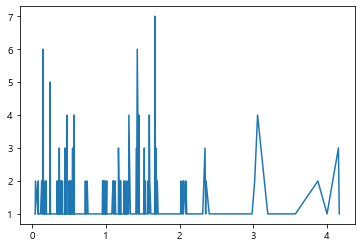

In [198]:
plt.plot(ex1['인접역까지의거리'], ex1['인접역수'])